In [2]:
from sklearn.datasets import make_classification
X,y = make_classification(n_samples = 1000,
                            n_features = 10,
                            n_clusters_per_class = 1,
                            n_classes = 2,
                            n_redundant = 3,
                            weights = [0.90],
                            random_state = 42)

<Axes: xlabel='0', ylabel='1'>

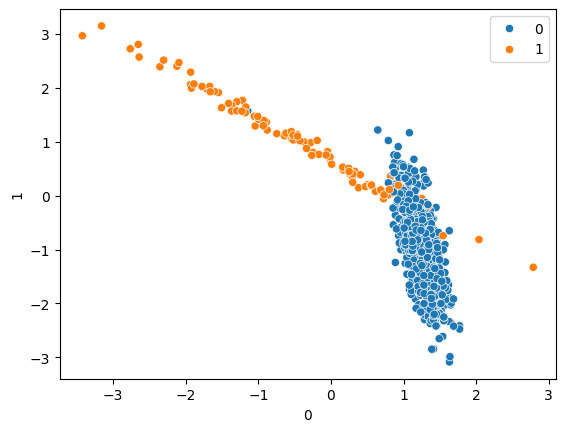

In [3]:
#Lets visualize the imbalanced dataset

import seaborn as sb
import pandas as pd
sb.scatterplot(x = pd.DataFrame(X)[0],y = pd.DataFrame(X)[1],hue = y)

In [4]:
#Implementing train test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.30,random_state = 42)

In [5]:
#Model training
from sklearn.linear_model import LogisticRegression

regression = LogisticRegression()

penalty = ['l1','l2','elasticnet']
C_values = [100,0.1,10,0.01,1.0]
solver = ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga']
weight = [{0:i,1:j} for i in [1,10,50,100] for j in [1,10,50,100]]

In [6]:
params = dict(penalty = penalty,C = C_values,solver = solver, class_weight = weight)
print(params)

{'penalty': ['l1', 'l2', 'elasticnet'], 'C': [100, 0.1, 10, 0.01, 1.0], 'solver': ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'], 'class_weight': [{0: 1, 1: 1}, {0: 1, 1: 10}, {0: 1, 1: 50}, {0: 1, 1: 100}, {0: 10, 1: 1}, {0: 10, 1: 10}, {0: 10, 1: 50}, {0: 10, 1: 100}, {0: 50, 1: 1}, {0: 50, 1: 10}, {0: 50, 1: 50}, {0: 50, 1: 100}, {0: 100, 1: 1}, {0: 100, 1: 10}, {0: 100, 1: 50}, {0: 100, 1: 100}]}


In [7]:
from sklearn.model_selection import StratifiedKFold

cv = StratifiedKFold()

In [9]:
from sklearn.model_selection import GridSearchCV

grid = GridSearchCV(estimator=regression,param_grid=params, cv = cv,scoring='accuracy')

grid.fit(X_train,y_train)

f:\ML\venv\lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
f:\ML\venv\lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
f:\ML\venv\lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
f:\ML\venv\lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
f:\ML\venv\lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
f:\ML\venv\lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
f:\ML\venv\lib\s

,estimator,LogisticRegression()
,param_grid,"{'C': [100, 0.1, ...], 'class_weight': [{0: 1, 1: 1}, {0: 1, 1: 10}, ...], 'penalty': ['l1', 'l2', ...], 'solver': ['lbfgs', 'liblinear', ...]}"
,scoring,'accuracy'
,n_jobs,None
,refit,True
,cv,StratifiedKFo...shuffle=False)
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,penalty,'l2'


In [11]:
print(f'The score is {grid.best_score_}')
print(f"The optimized parameters are selected as {grid.best_params_}")

The score is 0.9828571428571429
The optimized parameters are selected as {'C': 100, 'class_weight': {0: 50, 1: 50}, 'penalty': 'l2', 'solver': 'saga'}
